In [1]:
import os
import torch
from torch import nn, optim
from torch.nn import functional
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [2]:
GPU_indx = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')

In [3]:
batch_size = 256
data_set_root = 'datasets'

train_data = MNIST(data_set_root, train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST(data_set_root, train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=False)

In [4]:
images, labels = next(iter(train_loader))
print("image: \n", images.shape)
print("label: ", labels.shape)

image: 
 torch.Size([256, 1, 28, 28])
label:  torch.Size([256])


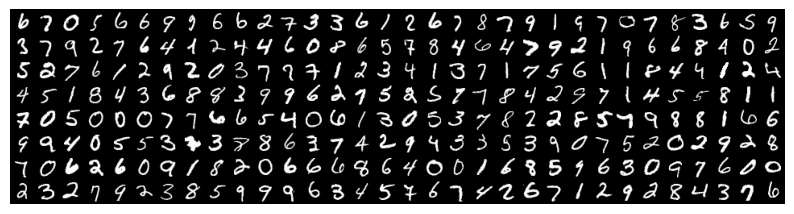

In [5]:
plt.figure(figsize=(10, 10))
out = torchvision.utils.make_grid(images, 32)
plt.axis("off")
plt.imshow(out.numpy().transpose((1, 2, 0)))

In [6]:
class MLP(nn.Module):
    def __init__(self, classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 248)
        self.dropout1 = nn.Dropout(0.3)  
        self.fc3 = nn.Linear(248, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(128, classes)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = functional.sigmoid(self.fc1(x))
        x = self.dropout1(x)
        x = functional.sigmoid(self.fc3(x))
        x = self.dropout2(x)
        x = self.fc4(x)
        return x

In [7]:
model = MLP(10).to(device=device)
criterion = nn.CrossEntropyLoss()
learning_rate = .0005
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
epochs = 20
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=248, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=248, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
def train_epoch(model, train_loader, criterion, optimizer):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    num_batches = len(train_loader)
    for index, (data, target) in enumerate(tqdm(train_loader, desc="Trainning", leave=False)):
        output = model(data.to(device))
        loss = criterion(output, target.to(device))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = torch.max(output, 1)
        correct_predictions += (predicted == target.to(device)).sum().item()
        total_predictions += target.shape[0]
    
    epoch_loss = total_loss / num_batches
    acc = (correct_predictions / total_predictions) * 100.0
    return model, optimizer, epoch_loss, acc

In [9]:
def test_model(model, test_loader, criterion):
    with torch.no_grad():
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        num_batches = len(test_loader)
        for index, (data, target) in enumerate(tqdm(test_loader, desc="Testing", leave=False)):
            output = model(data.to(device))
            _, predicted = torch.max(output, 1)
            
            loss = criterion(output, target.to(device))
            total_loss += loss.item()
            correct_predictions += (predicted == target.to(device)).sum().item()
            total_predictions += target.size(0)
        
        epoch_loss = total_loss / num_batches
        acc = (correct_predictions/total_predictions) * 100.0
        return acc, epoch_loss

In [10]:
train_loss = []
test_loss  = []
test_acc   = []
train_acc = []
for index in trange(epochs, desc="Epochs", leave=False):
    model, optimizer, epoch_train_loss, epoch_train_acc = train_epoch(
        model=model, train_loader=train_loader, criterion=criterion, optimizer=optimizer
    )
    epoch_test_acc, epoch_test_loss = test_model(
        model=model, test_loader=test_loader, criterion=criterion
    )
    train_loss.append(epoch_train_loss) 
    test_loss.append(epoch_test_loss)
    train_acc.append(epoch_train_acc)
    test_acc.append(epoch_test_acc)
print(f"Final Accuracy: {test_acc[-1]:.2f}%")

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Trainning:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Final Accuracy: 95.96%


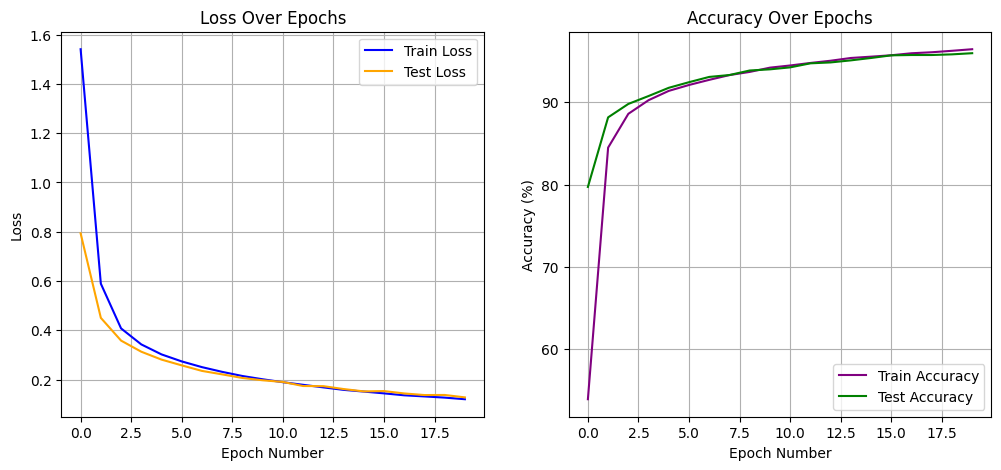

In [11]:

plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss", color="blue")
plt.plot(test_loss, label="Test Loss", color="orange")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.grid()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Accuracy", color="purple")
plt.plot(test_acc, label="Test Accuracy", color="green")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Over Epochs")
plt.legend()
plt.grid()

plt.show()


